#### Importing the Packages required for analysis:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels as sm
import sklearn as sklearn
import seaborn as sns
from sklearn.model_selection import train_test_split
from statsmodels.formula.api import ols
from sklearn import metrics
from scipy import stats
import pylab
from sklearn.feature_selection import f_regression
import itertools
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices
from sklearn.model_selection import train_test_split

#### Setting the Working Directory:

In [3]:
%cd C:\Users\hp\Desktop\Python\1. Predicting Credit Card Spend & Identifying Key Drivers

C:\Users\hp\Desktop\Python\1. Predicting Credit Card Spend & Identifying Key Drivers


#### Importing the data:

In [4]:
Master_Data=pd.read_excel('Data Set.xlsx')

#### Dimensions of the data:

In [5]:
Master_Data.shape

(5000, 130)

#### Because of high dimensionality (i.e. no. of variables are very large) we need to split them in two categories:
#### 1. Continuous Variables.
#### 2. Categorical Variables.

In [6]:
Categorical_Variables=['custid','region',
'townsize',
'gender',
'agecat',
'birthmonth',
'edcat',
'jobcat',
'union',
'employ',
'empcat',
'retire',
'inccat',
'default',
'jobsat',
'marital',
'spousedcat',
'homeown',
'hometype',
'address',
'addresscat',
'cars',
'carown',
'cartype',
'carcatvalue',
'carbought',
'carbuy',
'commute',
'commutecat',
'commutecar',
'commutemotorcycle',
'commutecarpool',
'commutebus',
'commuterail',
'commutepublic',
'commutebike',
'commutewalk',
'commutenonmotor',
'telecommute',
'reason',
'polview',
'polparty',
'polcontrib',
'vote',
'card',
'cardtype',
'cardbenefit',
'cardfee',
'cardtenure',
'cardtenurecat',
'card2',
'card2type',
'card2benefit',
'card2fee',
'card2tenure',
'card2tenurecat',
'active',
'bfast',
'churn',
'tollfree',
'equip',
'callcard',
'wireless',
'multline',
'voice',
'pager',
'internet',
'callid',
'callwait',
'forward',
'confer',
'ebill',
'owntv',
'ownvcr',
'owndvd',
'owncd',
'ownpda',
'ownpc',
'ownipod',
'owngame',
'ownfax',
'news',
'response_01',
'response_02',
'response_03']

In [7]:
Continuous_Variables=Master_Data.columns.difference(Categorical_Variables)

#### Now, we create extact two dataframes from the Master Data set

In [8]:
Categorical_Data=Master_Data[Categorical_Variables]

In [9]:
Continuous_Data=Master_Data[Continuous_Variables]

#### Checking the summary, separately for Categorical and Continuous data. 

In [10]:
def continuous_var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  
                      x.std(), x.var(), x.min(), x.quantile(0.01), x.quantile(0.05),
                          x.quantile(0.10),x.quantile(0.25),x.quantile(0.50),x.quantile(0.75), 
                              x.quantile(0.90),x.quantile(0.95), x.quantile(0.99),x.max()], 
                  index = ['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1', 
                               'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

In [11]:
def categorical_var_summary(x):
    Mode = x.value_counts().sort_values(ascending = False)[0:1].reset_index()
    return pd.Series([x.count(), x.isnull().sum(), Mode.iloc[0, 0], Mode.iloc[0, 1], 
                          round(Mode.iloc[0, 1] * 100/x.count(), 2)], 
                  index = ['N', 'NMISS', 'MODE', 'FREQ', 'PERCENT'])

In [12]:
Continuous_Data.apply(continuous_var_summary).round(2).T

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
age,5000.0,0.0,235128.00,47.03,47.00,17.77,315.78,18.00,18.00,20.00,23.00,31.00,47.00,62.00,72.00,76.00,79.00,79.00
card2spent,5000.0,0.0,804380.55,160.88,125.34,146.29,21401.57,0.00,0.00,14.82,28.64,66.97,125.34,208.31,324.72,419.45,712.13,2069.25
cardmon,5000.0,0.0,77219.25,15.44,13.75,15.01,225.23,0.00,0.00,0.00,0.00,0.00,13.75,22.75,34.00,42.00,64.25,188.50
cardspent,5000.0,0.0,1686012.60,337.20,276.36,245.15,60096.10,0.00,40.82,91.30,122.53,183.38,276.36,418.54,610.06,782.32,1215.81,3926.41
cardten,4998.0,2.0,3600951.00,720.48,425.00,922.23,850499.92,0.00,0.00,0.00,0.00,0.00,425.00,1080.00,1871.50,2455.75,4011.20,13705.00
carvalue,5000.0,0.0,116162.90,23.23,17.00,21.23,450.78,-1.00,-1.00,-1.00,2.49,9.20,17.00,31.10,52.91,72.00,92.00,99.60
commutetime,4998.0,2.0,126677.00,25.35,25.00,5.88,34.56,8.00,13.00,16.00,18.00,21.00,25.00,29.00,33.00,35.00,40.03,48.00
creddebt,5000.0,0.0,9286.63,1.86,0.93,3.42,11.67,0.00,0.03,0.10,0.18,0.39,0.93,2.06,4.30,6.37,14.28,109.07
debtinc,5000.0,0.0,49770.80,9.95,8.80,6.40,40.96,0.00,0.70,1.90,2.80,5.10,8.80,13.60,18.60,22.20,29.20,43.10
ed,5000.0,0.0,72715.00,14.54,14.00,3.28,10.77,6.00,8.00,9.00,10.00,12.00,14.00,17.00,19.00,20.00,21.00,23.00


#### There are some variables which have been derived by log transformation, we decide to drop these transformed these variables and check the impact of original variables in the model. Although we shall also try these transformed variables later for better results if required so.

In [13]:
Continuous_Data_New=Continuous_Data.drop(columns=['lnwireten',
'lnwiremon',
'lncardten',
'lncardmon',
'lnequipten',
'lnequipmon',
'lntollten',
'lntollmon',
'lnlongten',
'lnlongmon','lncreddebt','lnothdebt','lninc'])

#### Checking the summary of new dataframe for continuous variables.

In [14]:
Continuous_Data_New.apply(continuous_var_summary).round(2).T

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
age,5000.0,0.0,235128.00,47.03,47.00,17.77,315.78,18.0,18.00,20.00,23.00,31.00,47.00,62.00,72.00,76.00,79.00,79.00
card2spent,5000.0,0.0,804380.55,160.88,125.34,146.29,21401.57,0.0,0.00,14.82,28.64,66.97,125.34,208.31,324.72,419.45,712.13,2069.25
cardmon,5000.0,0.0,77219.25,15.44,13.75,15.01,225.23,0.0,0.00,0.00,0.00,0.00,13.75,22.75,34.00,42.00,64.25,188.50
cardspent,5000.0,0.0,1686012.60,337.20,276.36,245.15,60096.10,0.0,40.82,91.30,122.53,183.38,276.36,418.54,610.06,782.32,1215.81,3926.41
cardten,4998.0,2.0,3600951.00,720.48,425.00,922.23,850499.92,0.0,0.00,0.00,0.00,0.00,425.00,1080.00,1871.50,2455.75,4011.20,13705.00
carvalue,5000.0,0.0,116162.90,23.23,17.00,21.23,450.78,-1.0,-1.00,-1.00,2.49,9.20,17.00,31.10,52.91,72.00,92.00,99.60
commutetime,4998.0,2.0,126677.00,25.35,25.00,5.88,34.56,8.0,13.00,16.00,18.00,21.00,25.00,29.00,33.00,35.00,40.03,48.00
creddebt,5000.0,0.0,9286.63,1.86,0.93,3.42,11.67,0.0,0.03,0.10,0.18,0.39,0.93,2.06,4.30,6.37,14.28,109.07
debtinc,5000.0,0.0,49770.80,9.95,8.80,6.40,40.96,0.0,0.70,1.90,2.80,5.10,8.80,13.60,18.60,22.20,29.20,43.10
ed,5000.0,0.0,72715.00,14.54,14.00,3.28,10.77,6.0,8.00,9.00,10.00,12.00,14.00,17.00,19.00,20.00,21.00,23.00


In [15]:
Categorical_Data.apply(categorical_var_summary).round(2).T

,N,NMISS,MODE,FREQ,PERCENT
custid,5000,0,5072-BTZWQR-C58,1,0.02
region,5000,0,5,1027,20.54
townsize,4998,2,1,1436,28.73
gender,5000,0,1,2518,50.36
agecat,5000,0,4,1222,24.44
birthmonth,5000,0,September,458,9.16
edcat,5000,0,2,1567,31.34
jobcat,5000,0,2,1640,32.8
union,5000,0,0,4244,84.88
employ,5000,0,0,659,13.18


#### The categorical variables which hardly have any impact of our analysis will be dropped at this stage only and will not be used in final model. Such variables are: 
##### Customer ID: Unique Identifier, wise to drop at this stage only.
##### Birthmonth: A customer's spend on credit cards has nothing to do whith his/her birthmonth.

In [16]:
Categorical_Data_New=Categorical_Data.drop(columns=['custid','birthmonth'])

#### Combining the revised dataframes.

##### The features cardten, commutetime, longten have 2,2 and 3 missing values. Deleting the records corresponding to these won't cause any harm

In [18]:
Data_New=pd.concat([Continuous_Data_New,Categorical_Data_New],axis=1).dropna()

##### The categorical variables: agecat, edcat, empcat, inccat, cardtenurecat, card2tenurecat, addresscat are the grouped variables which have been derived from the continuous variables: age, ed, employ, income, cardtenure, card2tenure and address respectively. The model which we have developed was tried and tested for both the sets i.e categorcal alone and continuous alone and no significant difference was observed. Hence we can choose to go with one of the set only. In our case the variables that we decided to keep are: agecat, edcat, empcat,cardtenurecat, card2tenurecat, addresscat and income

In [19]:
Data_New_1=Data_New.drop(columns=['age','ed','employ','cardtenure','card2tenure','address'])

#### Creating the Dummy Variables.

In [20]:
def Dummy_var(x,colname):
    dummy_df=pd.get_dummies(x[colname],prefix=colname,drop_first=True)
    x=pd.concat([x,dummy_df],axis=1)
    x=x.drop([colname],axis=1)
    return x

In [21]:
for i in ['region',
'jobcat',
'hometype',
'carown',
'cartype',
'carcatvalue',
'carbought',
'reason',
'bfast',
'internet','card','cardbenefit','card2','cardtype','card2type','card2benefit']:
    Data_New_1=Dummy_var(Data_New_1,i)

#### Creating the Y variable

In [22]:
Data_New_1['Totalspent']=Data_New_1['cardspent']+Data_New_1['card2spent']

#### Checking the assumption of normality for our Y variable

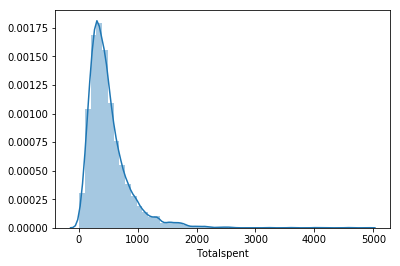

In [23]:
sns.distplot(Data_New_1['Totalspent'])

#### Transforming the Y to get a nearly symmetric bell-shaped curve.

In [24]:
Data_New_1['Sq_TS']=np.sqrt(Data_New_1['Totalspent'])

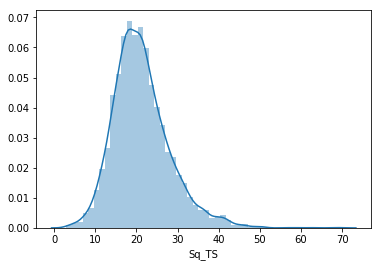

In [25]:
sns.distplot(Data_New_1['Sq_TS'])

#### Still the curve is not the desired one. Hence we do the following to get more closer to the symmetry.

#### Treating the outliers

##### In the revised continuous variable summary we had observed that the variables: 'cardspent' and 'card2spent' were heavily skewed on positive side and hence they need to be capped before we create our final dependent variable.

In [26]:
Data_New_1['cardspentcappedQ99']=np.where(Data_New_1['cardspent']>Data_New_1['cardspent'].quantile(0.99),
                                      Data_New_1['cardspent'].quantile(0.99),Data_New_1['cardspent'])

In [27]:
Data_New_1['card2spentcappedQ99']=np.where(Data_New_1['card2spent']>Data_New_1['card2spent'].quantile(0.99),
                                      Data_New_1['card2spent'].quantile(0.99),Data_New_1['card2spent'])

In [28]:
Data_New_1['TotalspentcappedQ99']=Data_New_1['cardspentcappedQ99']+Data_New_1['card2spentcappedQ99']

#### Checking the assumption of normality for our Y variable

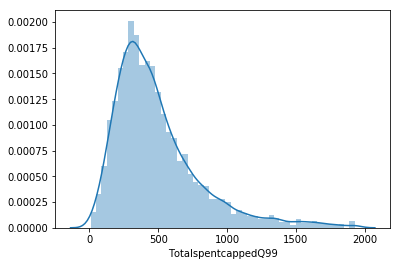

In [29]:
sns.distplot(Data_New_1['TotalspentcappedQ99'])

#### Transforming the Y to get a nearly symmetric bell-shaped curve.

In [32]:
Data_New_1['Sq_TSC']=np.sqrt(Data_New_1['TotalspentcappedQ99'])

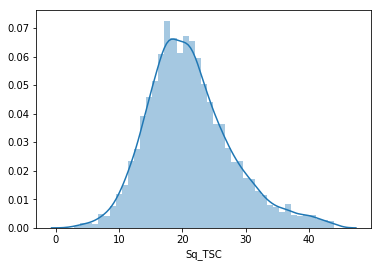

In [33]:
sns.distplot(Data_New_1['Sq_TSC'])

#### There are some other variables also which need to be capped because of the outliers, we first developed a model in order to understand the impact of outliers on the model and then compared its result with the model in which variables with outliers were capped.

#### Final step of Data Preparation. Taking out the cardspent and card2spent and their respective capped variables and only keeping the required Y in the data set before analyzing the correlatin matrix.

In [34]:
Data_model=Data_New_1.drop(columns=['cardspent','card2spent',
                                   'Totalspent','Sq_TS','cardspentcappedQ99',
                                   'card2spentcappedQ99'])

In [35]:
cols=Data_model.columns.to_list()
Data_model[cols[cols.index('Sq_TSC'):]+cols[:cols.index('Sq_TSC')]].corr().to_excel('CaseStudy1new.xlsx')

#### The correlation matrix can be viewed from  the attached excel sheet.

#### The variables which have very week correlation with the Y variable and do not have any multicolinearity can be dropped straight away.

In [36]:
Data_model_1=Data_model.drop(columns=['commutecar',
'commutemotorcycle',
'commutecarpool',
'commutebus',
'commuterail',
'commutepublic',
'commutebike',
'commutewalk',
'commutenonmotor',
'telecommute','polview',
'polparty',
'polcontrib',
'vote'])

##### Now, Dividing the final data into training and testing data sets.

In [37]:
train,test=train_test_split(Data_model_1,test_size=0.3,random_state=123)

In [38]:
Model1params= '''Sq_TSC~
cardmon+
 cardten+
 carvalue+
 commutetime+
 creddebt+
 debtinc+
 equipmon+
 equipten+
 hourstv+
 income+
 longmon+
 longten+
 othdebt+
 pets+
 pets_birds+
 pets_cats+
 pets_dogs+
 pets_freshfish+
 pets_reptiles+
 pets_saltfish+
 pets_small+
 reside+
 spoused+
 tenure+
 tollmon+
 tollten+
 wiremon+
 wireten+
 townsize+
 gender+
 agecat+
 edcat+
 union+
 empcat+
 retire+
 inccat+
 default+
 jobsat+
 marital+
 spousedcat+
 homeown+
 addresscat+
 cars+
 carbuy+
 commute+
 commutecat+
 cardfee+
 cardtenurecat+
 card2fee+
 card2tenurecat+
 active+
 churn+
 tollfree+
 equip+
 callcard+
 wireless+
 multline+
 voice+
 pager+
 callid+
 callwait+
 forward+
 confer+
 ebill+
 owntv+
 ownvcr+
 owndvd+
 owncd+
 ownpda+
 ownpc+
 ownipod+
 owngame+
 ownfax+
 news+
 response_01+
 response_02+
 response_03+
 region_2+
 region_3+
 region_4+
 region_5+
 jobcat_2+
 jobcat_3+
 jobcat_4+
 jobcat_5+
 jobcat_6+
 hometype_2+
 hometype_3+
 hometype_4+
 carown_0+
 carown_1+
 cartype_0+
 cartype_1+
 carcatvalue_1+
 carcatvalue_2+
 carcatvalue_3+
 carbought_0+
 carbought_1+
 reason_2+
 reason_3+
 reason_4+
 reason_9+
 bfast_2+
 bfast_3+
 internet_1+
 internet_2+
 internet_3+
 internet_4+
 card_2+
 card_3+
 card_4+
 card_5+
 cardbenefit_2+
 cardbenefit_3+
 cardbenefit_4+
 card2_2+
 card2_3+
 card2_4+
 card2_5+
 cardtype_2+
 cardtype_3+
 cardtype_4+
 card2type_2+
 card2type_3+
 card2type_4+
 card2benefit_2+
 card2benefit_3+
 card2benefit_4'''

In [39]:
Model1=ols(Model1params,train).fit()

In [40]:
print(Model1.summary())

                            OLS Regression Results                            
Dep. Variable:                 Sq_TSC   R-squared:                       0.382
Model:                            OLS   Adj. R-squared:                  0.359
Method:                 Least Squares   F-statistic:                     16.81
Date:                Tue, 08 Oct 2019   Prob (F-statistic):          5.05e-265
Time:                        21:22:52   Log-Likelihood:                -10809.
No. Observations:                3496   AIC:                         2.187e+04
Df Residuals:                    3371   BIC:                         2.264e+04
Df Model:                         124                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         26.1641      1.452     18.

#### Looking at the difference between R-squared and adjusted R-squared we observe that our model has very high multicolinearity and many insignificant variables. to reduce the number of features as well as multicolinearity we will perform F-test between each X variable and Y and will then analyze the VIF.

In [41]:
features=train[train.columns.difference(['Sq_TSC'])]
target=train['Sq_TSC']
F_values,P_values=f_regression(features,target)

In [43]:
f_reg_results=[(j,k,l) for j,k,l in itertools.zip_longest(features.columns,
                                                          F_values,("%3f"%p for p in P_values))]
f_reg_results=pd.DataFrame(f_reg_results,columns=['Variable','F_values','P_values'])
f_reg_results.to_excel('F_Regression.xlsx')

#### The results of F-regression can be found in the attached Excel sheet

#### Getting the list of variables which have p-values < 0.025

In [45]:
reduced_vars=f_reg_results[pd.to_numeric(f_reg_results.P_values)<0.025]['Variable'].to_list()

In [46]:
Model2params='''Sq_TSC~
addresscat+
 agecat+
 callid+
 callwait+
 carcatvalue_1+
 carcatvalue_2+
 carcatvalue_3+
 card2_2+
 card2_3+
 card2_4+
 card2_5+
 card2tenurecat+
 card_2+
 card_3+
 card_4+
 card_5+
 cardtenurecat+
 carown_0+
 carown_1+
 carvalue+
 confer+
 creddebt+
 edcat+
 empcat+
 equip+
 equipmon+
 equipten+
 forward+
 gender+
 homeown+
 hometype_2+
 hourstv+
 inccat+
 income+
 internet_3+
 internet_4+
 jobcat_2+
 jobcat_3+
 jobsat+
 longmon+
 longten+
 multline+
 news+
 othdebt+
 owncd+
 owndvd+
 ownfax+
 owngame+
 ownpc+
 ownpda+
 owntv+
 ownvcr+
 pager+
 reason_2+
 reason_4+
 response_02+
 response_03+
 retire+
 tenure+
 tollfree+
 tollmon+
 tollten+
 voice+
 wireless+
 wiremon+
 wireten'''

In [47]:
Model2=ols(Model2params,train).fit()

In [48]:
print(Model2.summary())

                            OLS Regression Results                            
Dep. Variable:                 Sq_TSC   R-squared:                       0.370
Model:                            OLS   Adj. R-squared:                  0.358
Method:                 Least Squares   F-statistic:                     31.04
Date:                Tue, 08 Oct 2019   Prob (F-statistic):          1.74e-291
Time:                        23:01:50   Log-Likelihood:                -10842.
No. Observations:                3496   AIC:                         2.182e+04
Df Residuals:                    3430   BIC:                         2.222e+04
Df Model:                          65                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         27.1042      1.131     23.

#### After performing the f_regression technique we are able to reduce the number of features from 123 from Model1 to 65 in model2. Yet our results are not that satisfactory, since the model still has a lot of insignificant variables and has multicolinearity as well.

#### To further reduce the multicolinearity we will use VIF analysis and correlation matrix of the Data set with reduced number of variables.

In [49]:
vif=pd.DataFrame()
y,X=dmatrices(Model2params,train,return_type='dataframe')
vif['Variable']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]

C:\Users\hp\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:181: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [372]:
vif.to_excel('CaseStudy1VIFNew.xlsx')

In [200]:
Data_model_1[['Sq_TSC']+reduced_vars].corr().to_excel('CaseStudy1reducedvarscorr.xlsx')

#### The VIF and Correlation Matrix have been analyzed in the attached excel sheet.

#### After reducing the number of features by a cumbersome iterative process of checking the correlation matrix and vif back and forth we are able to reduce the number of variables from 66 in Model2 to 50.

In [50]:
Model3params='''Sq_TSC~
 callid+
 callwait+
 carcatvalue_1+
 carcatvalue_3+
 card2_2+
 card2_3+
 card2_4+
 card2_5+
 card_2+
 card_3+
 card_4+
 card_5+
 carown_1+
 confer+
 creddebt+
 edcat+
 empcat+
 equipten+
 forward+
 gender+
 homeown+
 hometype_2+
 hourstv+
 income+
 internet_3+
 internet_4+
 jobcat_2+
 jobcat_3+
 longten+
 multline+
 news+
 othdebt+
 owncd+
 owndvd+
 ownfax+
 owngame+
 ownpc+
 ownpda+
 owntv+
 ownvcr+
 pager+
 reason_2+
 reason_4+
 response_02+
 response_03+
 retire+
 tenure+
 tollfree+
 voice+
 wireless'''

In [51]:
Model3=ols(Model3params,train).fit()

In [52]:
print(Model3.summary())

                            OLS Regression Results                            
Dep. Variable:                 Sq_TSC   R-squared:                       0.360
Model:                            OLS   Adj. R-squared:                  0.351
Method:                 Least Squares   F-statistic:                     38.72
Date:                Tue, 08 Oct 2019   Prob (F-statistic):          4.84e-291
Time:                        23:02:05   Log-Likelihood:                -10871.
No. Observations:                3496   AIC:                         2.184e+04
Df Residuals:                    3445   BIC:                         2.216e+04
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        28.0523      1.007     27.844

#### Now, we will be deleting the variables from the model basis their correlation with Y and significance of P_values.

In [53]:
Model4params='''Sq_TSC~
 carcatvalue_1+
 carcatvalue_3+
 card2_2+
 card2_3+
 card2_4+
 card2_5+
 card_2+
 card_3+
 card_4+
 card_5+
 carown_1+
 creddebt+
 gender+
 hourstv+
 income+
 internet_3+
 othdebt+
 owncd+
 owndvd+
 owntv+
 reason_2+
 reason_4+
 retire'''

In [54]:
Model4=ols(Model4params,train).fit()

In [55]:
print(Model4.summary())

                            OLS Regression Results                            
Dep. Variable:                 Sq_TSC   R-squared:                       0.355
Model:                            OLS   Adj. R-squared:                  0.351
Method:                 Least Squares   F-statistic:                     83.07
Date:                Tue, 08 Oct 2019   Prob (F-statistic):          4.88e-309
Time:                        23:02:19   Log-Likelihood:                -10884.
No. Observations:                3496   AIC:                         2.182e+04
Df Residuals:                    3472   BIC:                         2.196e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        28.1921      0.864     32.643

#### checking the relationship between few continuous variables and Y.

Text(0.5, 1.0, 'Y~othdebt')

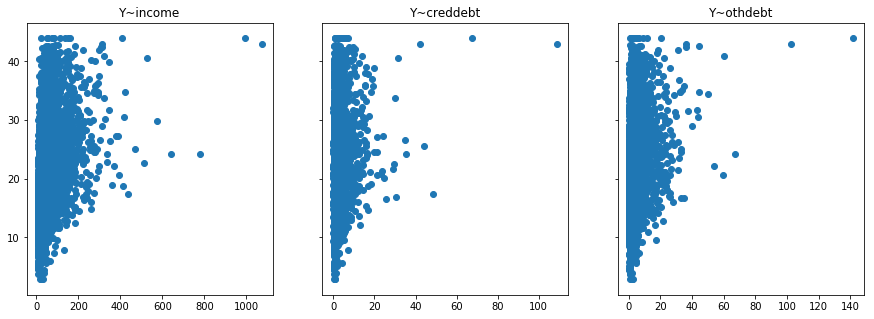

In [57]:
fig, (axarr1,axarr2,axarr3) = plt.subplots(nrows=1,ncols=3, figsize=(15,5),sharey=True)
axarr1.scatter(Data_model_1['income'],Data_model_1['Sq_TSC'])
axarr1.set_title("Y~income")
axarr2.scatter(Data_model_1['creddebt'],Data_model_1['Sq_TSC'])
axarr2.set_title("Y~creddebt")
axarr3.scatter(Data_model_1['othdebt'],Data_model_1['Sq_TSC'])
axarr3.set_title("Y~othdebt")

#### As we remember, we had not capped the income, creddebt and othdebt variable to check the impact of not treating outliers in the model. Let us cap them to see if there is actually any impact on final model or not.

In [58]:
Data_model_1['cred_capped_q99']=np.where(Data_model_1['creddebt']>Data_model_1['creddebt'].quantile(0.99),
                                         Data_model_1['creddebt'].quantile(0.99),Data_model_1['creddebt'])
Data_model_1['income_capped_q99']=np.where(Data_model_1['income']>Data_model_1['income'].quantile(0.99),
                                           Data_model_1['income'].quantile(0.99),Data_model_1['income'])
Data_model_1['oth_capped_q99']=np.where(Data_model_1['othdebt']>Data_model_1['othdebt'].quantile(0.99),
                                           Data_model_1['othdebt'].quantile(0.99),Data_model_1['othdebt'])

Text(0.5, 1.0, 'Y~othdebt 99')

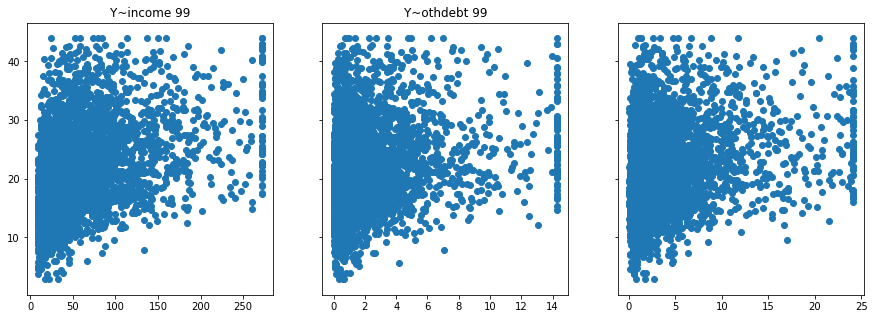

In [60]:
fig, (axarr1,axarr2,axarr3) = plt.subplots(nrows=1,ncols=3, figsize=(15,5),sharey=True)
axarr1.scatter(Data_model_1['income_capped_q99'],Data_model_1['Sq_TSC'])
axarr1.set_title("Y~income 99")
axarr2.scatter(Data_model_1['cred_capped_q99'],Data_model_1['Sq_TSC'])
axarr2.set_title("Y~creddebt 99")
axarr3.scatter(Data_model_1['oth_capped_q99'],Data_model_1['Sq_TSC'])
axarr2.set_title("Y~othdebt 99")

#### From the avove figures, cleary the capped variables have been able to explain Y more than the capped ones

#### Let us check this in the model now.

In [74]:
train_final,test_final=train_test_split(Data_model_1,test_size=0.3,random_state=123)

In [62]:
Model5params='''Sq_TSC~
 carcatvalue_1+
 card2_2+
 card2_3+
 card2_4+
 card2_5+
 card_2+
 card_3+
 card_4+
 card_5+
 carown_1+
 cred_capped_q99+
 gender+
 hourstv+
 income_capped_q99+
 internet_3+
 oth_capped_q99+
 owncd+
 owndvd+
 owntv+
 reason_2+
 reason_4+
 retire'''

In [66]:
Model5=ols(Model5params,train_final).fit()

In [67]:
print(Model5.summary())

                            OLS Regression Results                            
Dep. Variable:                 Sq_TSC   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.357
Method:                 Least Squares   F-statistic:                     89.15
Date:                Tue, 08 Oct 2019   Prob (F-statistic):          6.21e-317
Time:                        23:20:14   Log-Likelihood:                -10868.
No. Observations:                3496   AIC:                         2.178e+04
Df Residuals:                    3473   BIC:                         2.192e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            27.5512      0.86

#### After clipping the variables, we observed a slight increase in Adj. R-squared  and were also able to reduce variable carcatvalue_3 as it was coming out to be insignificat.

#### Let us now, transform the variables to check whether they are able to explain Y more or not.
#### We performed the analysis by transforming the variables in numerous ways like, clipping with mean instead of q99, taking squareroots of unclipped variablses, logarithms of unclipped as well as clipped variables and many more approaches wer tried and tested. The one which suited best for this scenario was taking logarithms of the q99 clipped variables.

In [73]:
Data_model_1['lncred99']=np.log(Data_model_1['cred_capped_q99']+1)
Data_model_1['lninc99']=np.log(Data_model_1['income_capped_q99'])
Data_model_1['lnoth99']=np.log(Data_model_1['oth_capped_q99']+1)

Text(0.5, 1.0, 'Y~log othdebt')

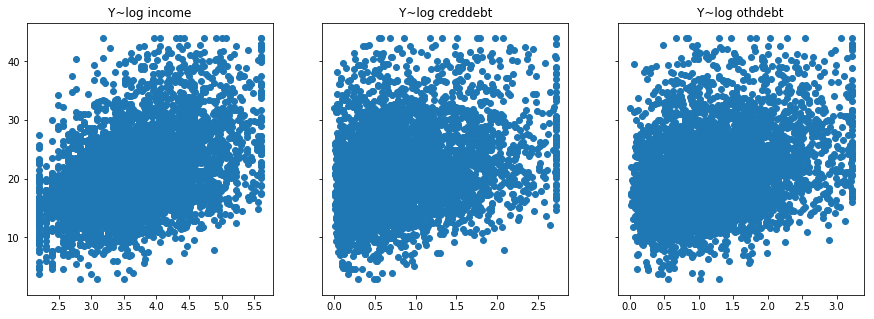

In [76]:
fig, (axarr1,axarr2,axarr3) = plt.subplots(nrows=1,ncols=3, figsize=(15,5),sharey=True)
axarr1.scatter(Data_model_1['lninc99'],Data_model_1['Sq_TSC'])
axarr1.set_title("Y~log income")
axarr2.scatter(Data_model_1['lncred99'],Data_model_1['Sq_TSC'])
axarr2.set_title("Y~log creddebt")
axarr3.scatter(Data_model_1['lnoth99'],Data_model_1['Sq_TSC'])
axarr3.set_title("Y~log othdebt")

In [77]:
Model6params='''Sq_TSC~
 card2_2+
 card2_3+
 card2_4+
 card2_5+
 card_2+
 card_3+
 card_4+
 card_5+
 lncred99+
 gender+
 hourstv+
 lninc99+
 internet_3+
 lnoth99+
 owntv+
 reason_2+
 reason_4'''

In [78]:
Model6=ols(Model6params,train_final).fit()

In [81]:
print(Model6.summary())

                            OLS Regression Results                            
Dep. Variable:                 Sq_TSC   R-squared:                       0.368
Model:                            OLS   Adj. R-squared:                  0.365
Method:                 Least Squares   F-statistic:                     119.0
Date:                Tue, 08 Oct 2019   Prob (F-statistic):               0.00
Time:                        23:25:40   Log-Likelihood:                -10849.
No. Observations:                3496   AIC:                         2.173e+04
Df Residuals:                    3478   BIC:                         2.185e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     17.8326      0.893     19.965      0.0

#### Clearly, the transformed variables have a much better impact as they have helped in increasing the adjusted R-squared by alsmost 1% and have helped in reducing the independent variables also.

## MAPE Calculation and Decile Analysis:

#### Calculating the predicted Total Card Spends of Customers.

In [394]:
train_final['pred_spend']=np.square(Model6.predict(train_final))
test_final['pred_spend']=np.square(Model6.predict(test_final))

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


#### Calculating the Mean Absolute Percentage Error for training and testing data.

In [395]:
MAPE_train=np.mean(np.abs(train_final['TotalspentcappedQ99']-train_final['pred_spend'])/train_final['TotalspentcappedQ99'])
MAPE_test=np.mean(np.abs(test_final['TotalspentcappedQ99']-test_final['pred_spend'])/test_final['TotalspentcappedQ99'])
print('MAPE of training data: ', MAPE_train,  ' | ', 'MAPE of testing data: ', MAPE_test)

MAPE of training data:  0.547242623370633  |  MAPE of testing data:  0.5708084034870426


###### The difference is very small, hence the model is consistent.

In [396]:
train_final['Deciles']=pd.qcut(train_final['pred_spend'],10,labels=False)
Pred_Avg=train_final[['Deciles','pred_spend']].groupby(train_final.Deciles).mean().sort_index(ascending=False)['pred_spend']
Actual_Avg=train_final[['Deciles','TotalspentcappedQ99']].groupby(train_final.Deciles).mean().sort_index(ascending=False)['TotalspentcappedQ99']
Decile_Analysis_Train=pd.concat([Pred_Avg,Actual_Avg],axis=1)

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [398]:
test_final['Deciles']=pd.qcut(test_final['pred_spend'],10,labels=False)
Pred_Avg=test_final[['Deciles','pred_spend']].groupby(test_final.Deciles).mean().sort_index(ascending=False)['pred_spend']
Actual_Avg=test_final[['Deciles','TotalspentcappedQ99']].groupby(test_final.Deciles).mean().sort_index(ascending=False)['TotalspentcappedQ99']
Decile_Analysis_Test=pd.concat([Pred_Avg,Actual_Avg],axis=1)

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [401]:
Decile_Analysis_Test

,pred_spend,TotalspentcappedQ99
Deciles,,
9,837.172539,882.966381
8,658.466836,646.888544
7,569.056490,577.235325
6,500.676044,485.610992
5,448.600734,458.350945
4,406.621670,420.376821
3,362.447589,375.818067
2,326.064767,364.025067
1,287.731412,321.877667


#### The Deciles are consistent for training and testing datasets.

## Test of Assumptions:

In [410]:
print("Mean of residuals",":",Model6.resid.mean(),"~",0)

Mean of residuals : 9.606350802546091e-15 ~ 0


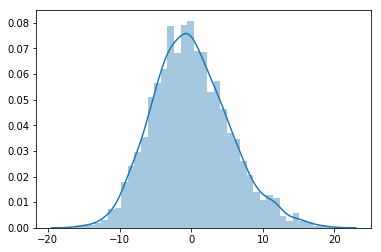

In [403]:
sns.distplot(Model6.resid)

#### The residuals are normally distributed.

#### Checking for Heteroskadesticity:

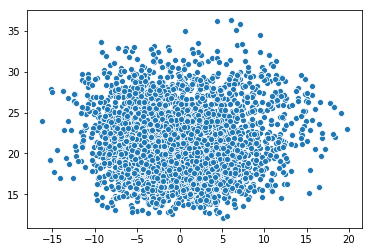

In [412]:
sns.scatterplot(Model6.resid,Model6.predict(train_final))

#### The above chart indicates that the error terms are uncorrelated.